In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

print(cv2.__version__)

4.8.1


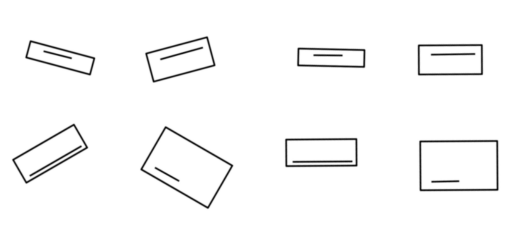

((467, 486, 3), (467, 486, 3))

In [2]:
im1_o = cv2.imread("original_final.png")
im2_o = cv2.imread("aligend_final.png")

def display_image(x,y):    
    plt.subplot(1,2,1)
   
    plt.imshow(x)
    plt.axis('off')
    plt.subplot(1,2,2)
   
    plt.imshow(y)
    plt.axis('off')
    plt.show()
    
display_image(im1_o,im2_o)

im1_o.shape,im2_o.shape

In [3]:
def make_grayscale(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    
im1_gray = make_grayscale(im1_o)
im2_gray = make_grayscale(im2_o)



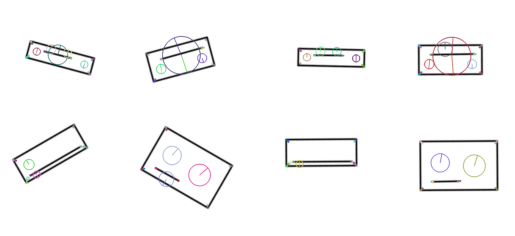

In [4]:
sift = cv2.SIFT_create()

keyp1,des1 = sift.detectAndCompute(im1_gray,None)
keyp2,des2  = sift.detectAndCompute(im2_gray,None)


im1_display = cv2.drawKeypoints(im1_gray,keyp1,-1,
                                flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im2_display = cv2.drawKeypoints(im2_gray,keyp2,-1,
                               flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


display_image(im1_display,im2_display)


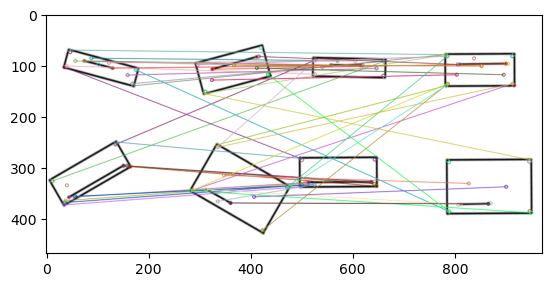

In [5]:

def get_good_matches(matches):    
    goodMatches = []
    good_without_list = []
    for m, n in matches:
        if m.distance < 0.86 * n.distance:
            goodMatches.append([m])
            good_without_list.append(m)
    
    return goodMatches,good_without_list
        
bf = cv2.BFMatcher()   
goodMatches, good_without_list = get_good_matches(bf.knnMatch(des1,des2,k  = 2))
    
        
imgMatch = cv2.drawMatchesKnn(im1_gray,keyp1,im2_gray,keyp2,goodMatches,None)
plt.imshow(imgMatch)

In [6]:
points1 = np.zeros((len(goodMatches), 2), dtype=np.float32)
points2 = np.zeros((len(goodMatches), 2), dtype=np.float32)


  
for i in range(len(goodMatches)): 
 
  points1[i, :] = keyp1[good_without_list[i].queryIdx].pt 
  points2[i, :] = keyp2[good_without_list[i].trainIdx].pt 
    
    

h,mask = cv2.findHomography(points1,points2,cv2.RANSAC)

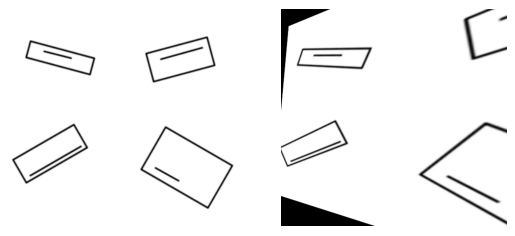

In [7]:
# Wrap the image

height, width, channels = im1_o.shape

im1_reg = cv2.warpPerspective(im1_o,h,(width,height))


display_image(im1_o,im1_reg)


## Another


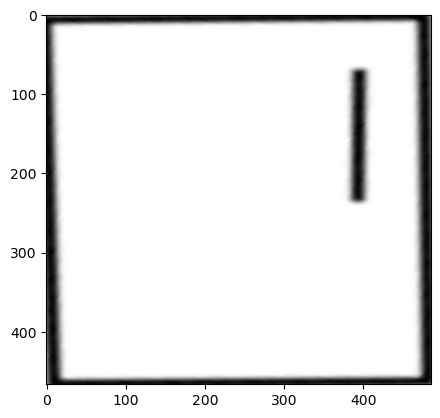

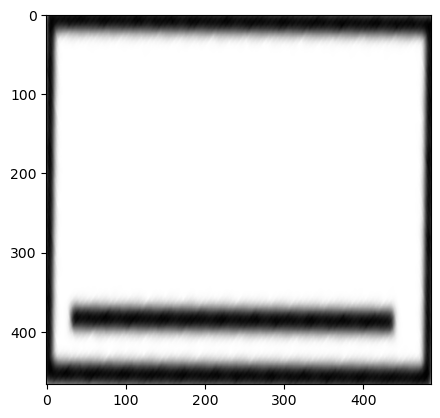

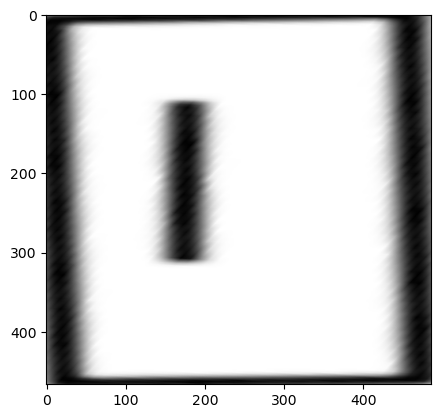

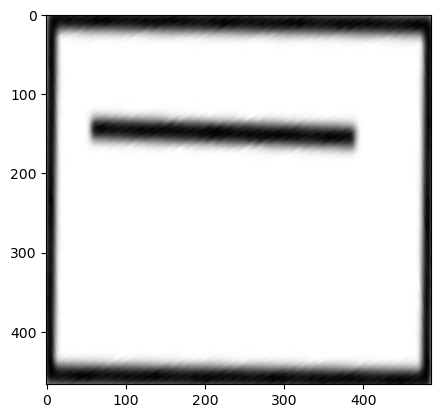

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("original_final.png")

height, width, channels = image.shape

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection (optional, depending on the image)
edges = cv2.Canny(gray, 50, 150)


contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


rectangles = []
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 1000:  
        epsilon = 0.05 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) == 4:
            rectangles.append(approx)

            
imag_arr = []
for rect_points in rectangles:
    rect_points = rect_points.reshape(-1, 2)
    rect = cv2.minAreaRect(rect_points)
    box = cv2.boxPoints(rect)
    box = np.intp(box)

    # Calculate the transformation matrix
    src_pts = rect_points.astype(np.float32)
    dst_pts = np.array([[0, 0], [width , 0], [width , height ], [0, height]], dtype=np.float32)
    transformation_matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)

    # Apply the transformation to align the rectangle
    aligned_image = cv2.warpPerspective(image, transformation_matrix, (width, height))
  
    imag_arr.append(aligned_image)


for i in imag_arr:
    plt.imshow(i)
    plt.show()
